# Project: Wrangling and Analyze Data

In [1]:
# import everything for the following data wrangling process.
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import time
from timeit import default_timer as timer
import datetime
import random
import re
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from functools import reduce

# set the option to display the full string from a pandas dataframe.
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# load the WeRateDogs Twitter archive data ("twitter-archive-enhanced.csv") into a dataframe.
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# load the tweet image prediction ("image_predictions.tsv").
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# check if request was successful.
response.status_code

200

In [5]:
# load the tweet image prediction ("image_predictions.tsv") into a dataframe.
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file.
# These are hidden to comply with Twitter's API terms and conditions.
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor.
# Tweet IDs for which to gather additional data via Twitter's API.

tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

2356

Query Twitter's API for JSON data for each tweet ID in the Twitter archive

NOTE TO REVIEWER: As I do not have access to Twitter this query would take at least 15 minutes and result in serveral "Fail" responses.
In addition, it would create a ".txt" file without content which is not usable for the further Data Wrangling process.
You can find this empty .txt file in my Jupyther notebook. I renamed it in 'tweet_jsonV2.txt'.
Therefore, I changed this cell to a markdown cell and continued with the "tweet_json.txt" file supported from UDACITY, which you can find in my Jupyter notebook as well. 

count = 0
fails_dict = {}
start = timer()

Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# read the correct "tweet_json.txt" file and load the data into a dataFrame.
# I renamed the "tweet-json copy" file, which was supported by UDACITY, into "tweet_json.txt".

temp = []
import json 

with open('tweet_json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

In [9]:
df_twitter_API = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])                                                      
df_twitter_API.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
# visual assessment of "df_twitter_archive".
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [11]:
# There are some rows with "None" in the dog "name" column.
# There are some non capitalized words in the dog "name" column, which are no actual dog names.
# There is a denominator not equal to 10.

In [12]:
# programmatic assessment of "df_twitter_archive".
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# tweet_id is in integer.
# timestamp is in object.
# rating_numerator is in integer.
# rating_denominator is in integer.
# 78 entries for replies.
# 181 entries for retweets.
# The columns related to replies and retweets are not applicable for original tweets.
# 4 columns for dog stages (doggo, floofer, pupper, puppo).

In [14]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# maximum numerator is 1776, while the mean numerator is 13.13, this is far out of range.
# maximum denominator is 170, minimum denominator is 0, denominators should be 10 overall.

In [16]:
df_twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [17]:
sum(df_twitter_archive.rating_numerator > 15)

26

In [18]:
# There are 26 numerators above 15 which are out of range in this statistic.

In [19]:
df_twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [20]:
sum(df_twitter_archive.rating_denominator != 10)

23

In [21]:
# There are 23 denominators different than 10.

In [22]:
df_twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [23]:
# There are 59 Nulls in the column expanded_urls.

In [24]:
df_twitter_archive.duplicated().sum()

0

In [25]:
df_twitter_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Cooper          11 
Oliver          11 
Lucy            11 
Tucker          10 
Lola            10 
Penny           10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
an              7  
Buddy           7  
Toby            7  
Bailey          7  
Daisy           7  
Jack            6  
Oscar           6  
Milo            6  
Rusty           6  
Leo             6  
Bella           6  
Scout           6  
Stanley         6  
Dave            6  
Jax             6  
Koda            6  
George          5  
               ..  
Loomis          1  
DonDon          1  
Charl           1  
Harnold         1  
Spencer         1  
Darby           1  
Hanz            1  
Ben             1  
Alf             1  
Charleson       1  
Tito            1  
Oreo            1  
Taz             1  
light           1  
Kendall         1  
Dale            1  
Cannon          1  
Franq           1  
Dutch           1  


In [26]:
# There are 745 rows with "None" in the dog "name" column.
# There are several non capitalized words in the dog "name" column, which are no actual dog names.

In [27]:
# The dog names inclusive the "None" entries are all capitalized. Therefore, list all enries which are not capitalized.
wrong_names = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[wrong_names].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [28]:
df_twitter_archive[wrong_names].name.value_counts().sort_index().sum()

109

In [29]:
# There are 109 non capitalized words in the dog "name" column, which are no actual dog names.

In [30]:
df_twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [31]:
df_twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [32]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [33]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [34]:
# visual assessment of "df_image_prediction".
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
# programmatic assessment of "df_image_prediction".
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# tweet_id is integer.

In [37]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [39]:
df_image_prediction.duplicated().sum()

0

In [40]:
# visual assessment of "df_twitter_API".
df_twitter_API

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,20562,3261,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,12041,2158,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,56848,16716,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,28226,4429,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,32467,7711,Original tweet,https://t.co/t1bfwz5S2A


In [41]:
# programmatic assessment of "df_twitter_API".
df_twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [42]:
# tweet_id is integer.

In [43]:
df_twitter_API.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [44]:
df_twitter_API.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
retweet_status    0
url               0
dtype: int64

In [45]:
df_twitter_API.duplicated().sum()

0

### Quality issues

1. In all three dataframes ("df_twitter_archive", "df_image_prediction", and "df_twitter_API") the column "tweet_id" is in integer datatype. It should be in object (string) datatype. In addition, in the dataframe "df_twitter_archive" the column "timestamp" is in string format. It should be in datetime format.

2. In the dataframe "df_twitter_archive" the columns "rating_numerator" and "rating_denominator" are in integer datatype. They should be in float format. In addition, some ratings in the column "text" show that there are decimal ratings. These ratings should be extracted and replaced correctly. 

3. In the dataframe "df_twitter_archive" are 78 rows with "reply tweet" content (columns: in_reply_to_status_id, in_reply_to_user_id). Following the key points we should only use data with original tweets. These rows and columns are not necessary (unuseable) and should be deleted.

4. In the dataframe "df_twitter_archive" are 181 rows with "retweet" content (columns: retweeted_status_id, retweeded_status_user_id, retweeted_status_timestamp). Following the key points we should only use data with original tweets. These rows and columns are not necessary (unuseable) and should be deleted. 

5. In the dataframe "df_twitter_archive" are 26 rows with a numerator above 15 (column: rating_numerator). The maximum numerator is 1776, while the mean numerator is 13.13, this is far out of range. These rows should be deleted.

6. In the dataframe "df_twitter_archive" are 23 rows with a denominator not equal to 10 (column: rating_denominator). The maximum denominator is 170, the minimum denominator is 0, denominators should be 10 overall. These rows should be deleted. 

7. In the dataframe "df_twitter_archive" are 59 rows with Null values in the column "expanded_urls". This indicates missing value. These rows should be deleted.

8. In the dataframe "df_twitter_archive" are 745 rows with "None" and 109 rows with a "non capitalized word" in the column "name". These are all no real dog names. This indicates invalid and/or missing data. We will not find the correct dog names for the "None" entries in the three dataframes, but the 109 entries with a "non capitalized word" should be replaced with "None".

### Tidiness issues

1. There are three dataframes ("df_twitter_archive", "df_image_prediction", and "df_twitter_API"), which have all information about the same Tweets. Theses dataframes should be merged together into one dataframe using the Tweet ID in the column "tweet_id".

2. In the dataframe "df_twitter_archive" ("df_twitter_merged_clean" after merging the three datasets) are four columns for dog stages (doggo, floofer, pupper, puppo). The information of the dog stage should be combined into one column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [46]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_twitter_API_clean = df_twitter_API.copy()

### Quality Issue #1: In all three dataframes ("df_twitter_archive", "df_image_prediction", and "df_twitter_API") the column "tweet_id" is in integer datatype. It should be in object (string) datatype. In addition, in the dataframe "df_twitter_archive" the column "timestamp" is in string format. It should be in datetime format.

#### Define: Change tweet_id from an integer to a string in all three dataframes and convert the timestamp column into a datetime datatype in the dataframe "df_twitter_archive".

#### Code

In [47]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
df_twitter_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [50]:
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)

In [51]:
df_image_prediction_clean['tweet_id'] = df_image_prediction_clean['tweet_id'].astype(str)

In [52]:
df_twitter_API_clean['tweet_id'] = df_twitter_API_clean['tweet_id'].astype(str)

In [53]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean['timestamp'] = df_twitter_archive_clean.timestamp.dt.floor('s')

#### Test

In [54]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [55]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [56]:
df_twitter_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


### Quality Issue #2: In the dataframe "df_twitter_archive" the columns "rating_numerator" and "rating_denominator" are in integer datatype. They should be in float format. Some ratings in the column "text" show that there are decimal ratings. These should be extracted correctly. 

#### Define: Convert the rating_numerator and rating_denominator columns into a float datatype and extract the decimal numerator ratings from the "text" column, and replace the ratings in the "rating_numerator" column.

#### Code

In [57]:
df_twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [58]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [59]:
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)

In [60]:
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [61]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

#### Code

In [62]:
# extract all decimal numerator ratings from each row.
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in df_twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# print the text which include decimal numerator ratings.        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [63]:
# print the index of the text which include decimal numerator ratings.
ratings_with_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [64]:
# replace the incorrect integer numerator ratings with the correct decimal numerator ratings from the text column.
df_twitter_archive_clean.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
df_twitter_archive_clean.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
df_twitter_archive_clean.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
df_twitter_archive_clean.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])
df_twitter_archive_clean.loc[ratings_with_decimals_index[4],'rating_numerator'] = float(ratings_with_decimals[4])
df_twitter_archive_clean.loc[ratings_with_decimals_index[5],'rating_numerator'] = float(ratings_with_decimals[5])

#### Test

In [65]:
df_twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776.00    1  
960.00     1  
666.00     1  
420.00     2  
204.00     1  
182.00     1  
165.00     1  
144.00     1  
143.00     1  
121.00     1  
99.00      1  
88.00      1  
84.00      1  
80.00      1  
60.00      1  
50.00      1  
45.00      1  
44.00      1  
24.00      1  
20.00      1  
17.00      1  
15.00      2  
14.00      54 
13.50      1  
13.00      351
12.00      558
11.27      1  
11.26      1  
11.00      464
10.00      461
9.75       2  
9.50       1  
9.00       158
8.00       102
7.00       55 
6.00       32 
5.00       35 
4.00       17 
3.00       19 
2.00       9  
1.00       9  
0.00       2  
Name: rating_numerator, dtype: int64

### Quality Issue #3: In the dataframe "df_twitter_archive" are 78 rows with "reply tweet" content (columns: in_reply_to_status_id, in_reply_to_user_id). Following the key points we should only use data with original tweets. These rows and columns are not necessary (unuseable) and should be deleted.

#### Define: Drop all rows with "reply tweets" content (= rows which have non-null values in the columns: in_reply_to_status_id and in_reply_to_user_id) and drop all columns related to reply content (columns: in_reply_to_status_id, in_reply_to_user_id).

#### Code

In [66]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [67]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isna()]

#### Test

In [68]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null float64
rating_denominator            2278 non-null float64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns

#### Code

In [69]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id',
                                                          'in_reply_to_user_id',], axis = 1)

#### Test

In [70]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null object
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null float64
rating_denominator            2278 non-null float64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 284.8+ KB


### Quality Issue #4: In the dataframe "df_twitter_archive" are 181 rows with "retweet" content (columns: retweeted_status_id, retweeded_status_user_id, retweeted_status_timestamp). Following the key points we should only use data with original tweets. These rows and columns are not necessary (unuseable) and should be deleted. 

#### Define: Drop all rows with "retweet tweets" content (= rows which have non-null values in the columns: retweeted_status_id, retweeded_status_user_id, retweeted_status_timestamp) and drop all columns related to retweet content (columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [71]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null object
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null float64
rating_denominator            2278 non-null float64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 284.8+ KB


In [72]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isna()]

#### Test

In [73]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2097 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 262.1+ KB


#### Code

In [74]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['retweeted_status_id',
                                                          'retweeted_status_user_id',
                                                          'retweeted_status_timestamp'], axis = 1)

#### Test

In [75]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


### Quality Issue #5: In the dataframe "df_twitter_archive" are 26 rows with a numerator above 15 (column: rating_numerator). The maximum numerator is 1776, while the mean numerator is 13.13, this is far out of range. These rows should be deleted.

#### Define: Drop all rows with a numerator rating above 15 (column: rating_numerator > 15).

#### Code

In [76]:
df_twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776.00    1  
420.00     1  
204.00     1  
165.00     1  
144.00     1  
121.00     1  
99.00      1  
88.00      1  
84.00      1  
80.00      1  
60.00      1  
50.00      1  
45.00      1  
44.00      1  
24.00      1  
14.00      38 
13.50      1  
13.00      287
12.00      486
11.27      1  
11.26      1  
11.00      413
10.00      436
9.75       1  
9.00       153
8.00       98 
7.00       52 
6.00       32 
5.00       33 
4.00       16 
3.00       19 
2.00       9  
1.00       5  
0.00       1  
Name: rating_numerator, dtype: int64

In [77]:
sum(df_twitter_archive_clean.rating_numerator > 15)

15

In [78]:
# After solving the Quality Issues above, the 26 rows with a "numerator above 15" already dropped to 15 rows.

In [79]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator < 16]

#### Test

In [80]:
df_twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14.00    38 
13.50    1  
13.00    287
12.00    486
11.27    1  
11.26    1  
11.00    413
10.00    436
9.75     1  
9.00     153
8.00     98 
7.00     52 
6.00     32 
5.00     33 
4.00     16 
3.00     19 
2.00     9  
1.00     5  
0.00     1  
Name: rating_numerator, dtype: int64

In [81]:
sum(df_twitter_archive_clean.rating_numerator > 15)

0

### Quality Issue #6: In the dataframe "df_twitter_archive" are 23 rows with a denominator not equal to 10 (column: rating_denominator). The maximum denominator is 170, the minimum denominator is 0, denominators should be 10 overall. These rows should be deleted.

#### Define: Drop all rows with a denominator rating not equal to 10 (column: rating_denominator != 10).

#### Code

In [82]:
df_twitter_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

20.0    1   
11.0    2   
10.0    2078
2.0     1   
Name: rating_denominator, dtype: int64

In [83]:
sum(df_twitter_archive_clean.rating_denominator != 10)

4

In [84]:
# After solving the Quality Issues above, the 23 rows with a "denominator not equal to 10" already dropped to 4 rows.

In [85]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator == 10]

#### Test

In [86]:
df_twitter_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10.0    2078
Name: rating_denominator, dtype: int64

In [87]:
sum(df_twitter_archive_clean.rating_denominator != 10)

0

### Quality Issue #7: In the dataframe "df_twitter_archive" are 59 rows with Null values in the column "expanded_urls". This indicates missing value. These rows should be deleted.

#### Define: Drop all rows with Null value in the column "expanded_urls".

#### Code

In [88]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2078 non-null object
timestamp             2078 non-null datetime64[ns]
source                2078 non-null object
text                  2078 non-null object
expanded_urls         2075 non-null object
rating_numerator      2078 non-null float64
rating_denominator    2078 non-null float64
name                  2078 non-null object
doggo                 2078 non-null object
floofer               2078 non-null object
pupper                2078 non-null object
puppo                 2078 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 211.0+ KB


In [89]:
df_twitter_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         3
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [90]:
# After solving the Quality Issues above, the 59 rows with with Null values in the column "expanded_urls" already dropped to 3 rows.

In [91]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [92]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null float64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 210.7+ KB


### Quality Issue #8: In the dataframe "df_twitter_archive" are 745 rows with "None" and 109 rows with a "non capitalized word" in the column "name". These are all no real dog names. This indicates invalid and/or missing data. We will not find the correct dog names for the "None" entries in the three dataframes, but the 109 entries with a "non capitalized word" should be replaced with "None".

#### Define: Replace all "non capitalized words" in the column "name" with "None".

#### Code

In [93]:
df_twitter_archive_clean.name.value_counts()

None            588
a               54 
Charlie         11 
Lucy            11 
Cooper          10 
Oliver          10 
Tucker          9  
Penny           9  
Winston         8  
Lola            8  
the             8  
Sadie           8  
Toby            7  
Daisy           7  
Stanley         6  
Oscar           6  
Jax             6  
Bo              6  
Bella           6  
Bailey          6  
Koda            6  
Milo            5  
Chester         5  
Rusty           5  
Scout           5  
Dave            5  
Buddy           5  
Bentley         5  
Leo             5  
an              5  
               ..  
Loomis          1  
DonDon          1  
Charl           1  
Seamus          1  
Hanz            1  
Huck            1  
Cleopatricia    1  
Napolean        1  
Scott           1  
Tom             1  
Ben             1  
Charleson       1  
Tito            1  
Oreo            1  
Taz             1  
light           1  
Kendall         1  
Atticus         1  
Blu             1  


In [94]:
wrong_names = df_twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
df_twitter_archive_clean[wrong_names].name.value_counts().sort_index()

a               54
actually        2 
all             1 
an              5 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [95]:
df_twitter_archive_clean[wrong_names].name.value_counts().sort_index().sum()

101

In [96]:
# After solving the Quality Issues above, the 109 rows with a "non capitalized word" in the column "name" already dropped to 101 rows.

In [97]:
df_twitter_archive_clean.loc[wrong_names, 'name'] = "None"

#### Test

In [98]:
df_twitter_archive_clean[wrong_names].name.value_counts().sort_index()

None    101
Name: name, dtype: int64

In [99]:
df_twitter_archive_clean.name.value_counts()

None        689
Charlie     11 
Lucy        11 
Cooper      10 
Oliver      10 
Tucker      9  
Penny       9  
Winston     8  
Lola        8  
Sadie       8  
Toby        7  
Daisy       7  
Jax         6  
Bailey      6  
Bella       6  
Stanley     6  
Koda        6  
Bo          6  
Oscar       6  
Chester     5  
Dave        5  
Buddy       5  
Louis       5  
Leo         5  
Bentley     5  
Scout       5  
Milo        5  
Rusty       5  
Boomer      4  
Scooter     4  
           ..  
Darla       1  
Henry       1  
Rueben      1  
Bobbay      1  
Brockly     1  
Pubert      1  
Brat        1  
Beemo       1  
Sephie      1  
Wishes      1  
Kollin      1  
Boots       1  
Stubert     1  
Halo        1  
Billy       1  
Grey        1  
Mark        1  
Noosh       1  
Chaz        1  
Snoopy      1  
Chelsea     1  
Lilli       1  
Staniel     1  
BeBe        1  
Asher       1  
Herschel    1  
Angel       1  
Lillie      1  
Randall     1  
Horace      1  
Name: name, Length: 928,

### Tidiness Issue #1: There are three dataframes ("df_twitter_archive", "df_image_prediction", and "df_twitter_API"), which have all information about the same Tweets. Theses dataframes should be merged together into one dataframe using the Tweet ID in the column "tweet_id".

#### Define: Merge all three dataframes into one dataframe using the reduce function with the column "tweet_id".

#### Code

In [100]:
df_twitter_clean = [df_twitter_archive_clean, df_image_prediction_clean, df_twitter_API_clean]
df_twitter_merged_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df_twitter_clean)

#### Test

In [101]:
df_twitter_merged_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,...,bagel,0.085851,False,banana,0.076110,False,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,Original tweet,https://t.co/AtUZn91f7f


In [102]:
df_twitter_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 27 columns):
tweet_id              1952 non-null object
timestamp             1952 non-null datetime64[ns]
source                1952 non-null object
text                  1952 non-null object
expanded_urls         1952 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1952 non-null object
doggo                 1952 non-null object
floofer               1952 non-null object
pupper                1952 non-null object
puppo                 1952 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null int64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null bool
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null bool
p3                    1952

In [103]:
df_twitter_merged_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1952.000000,1952.0,1952.000000,1952.000000,1.952000e+03,1.952000e+03,1952.000000,1952.000000
mean,10.542920,10.0,1.202357,0.594351,1.349446e-01,6.011246e-02,8973.575307,2785.077869
std,2.170599,0.0,0.559650,0.272239,1.012024e-01,5.083426e-02,12308.268441,4707.635325
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,10.000000,10.0,1.000000,0.362775,5.352722e-02,1.595832e-02,1956.750000,623.750000
50%,11.000000,10.0,1.000000,0.587635,1.178485e-01,4.941030e-02,4145.500000,1363.000000
75%,12.000000,10.0,1.000000,0.847062,1.963338e-01,9.157912e-02,11425.000000,3241.000000
max,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


### Tidiness Issue #2: In the dataframe "df_twitter_archive" ("df_twitter_merged_clean" after merging the three datasets) are four columns for dog stages (doggo, floofer, pupper, puppo). The information of the dog stage should be combined into one column.

#### Define: Extract  the dog stages from the columns ("doggo", "floofer", "pupper", "puppo") and fill the information into one new column "dog_stage", and drop the four columns "doggo", "floofer", "pupper", and "puppo".

#### Code

In [104]:
df_twitter_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 27 columns):
tweet_id              1952 non-null object
timestamp             1952 non-null datetime64[ns]
source                1952 non-null object
text                  1952 non-null object
expanded_urls         1952 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1952 non-null object
doggo                 1952 non-null object
floofer               1952 non-null object
pupper                1952 non-null object
puppo                 1952 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null int64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null bool
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null bool
p3                    1952

In [105]:
# create new column "dog_stage".
df_twitter_merged_clean['dog_stage'] = 'None'

# extract the dog stages from each row and fill the information in the new column.
def extract_dog_stage(row):
    dog_stage = []
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    return row

df_twitter_merged_clean = df_twitter_merged_clean.apply(extract_dog_stage, axis=1)

#### Test

In [106]:
# check if extracted dog breeds information is in one column.
df_twitter_merged_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(25)

,dog_stage,doggo,floofer,pupper,puppo
0,None,None,None,None,None
1,None,None,None,None,None
2,None,None,None,None,None
3,None,None,None,None,None
4,None,None,None,None,None
5,None,None,None,None,None
6,None,None,None,None,None
7,None,None,None,None,None
8,None,None,None,None,None
9,doggo,doggo,None,None,None


In [107]:
df_twitter_merged_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].tail(25)

,dog_stage,doggo,floofer,pupper,puppo
1927,None,None,None,None,None
1928,None,None,None,None,None
1929,None,None,None,None,None
1930,None,None,None,None,None
1931,None,None,None,None,None
1932,None,None,None,None,None
1933,None,None,None,None,None
1934,None,None,None,None,None
1935,None,None,None,None,None
1936,None,None,None,None,None


#### Code

In [108]:
# drop the columns doggo, floofer, pupper, and puppo columns.
df_twitter_merged_clean = df_twitter_merged_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [109]:
df_twitter_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 24 columns):
tweet_id              1952 non-null object
timestamp             1952 non-null datetime64[ns]
source                1952 non-null object
text                  1952 non-null object
expanded_urls         1952 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1952 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null int64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null bool
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null bool
p3                    1952 non-null object
p3_conf               1952 non-null float64
p3_dog                1952 non-null bool
favorite_count        1952 non-null int64
retweet_count         1952 n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
# save cleaned master dataset "df_twitter_merged_clean" to a CSV file called "twitter_archive_master.csv".
df_twitter_merged_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
df_twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweet_status,url,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.085851,False,banana,0.076110,False,39467,8853,Original tweet,https://t.co/MgUWQ76dJU,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.090647,True,papillon,0.068957,True,33819,6514,Original tweet,https://t.co/0Xxu71qeIV,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.078253,True,kelpie,0.031379,True,25461,4328,Original tweet,https://t.co/wUnZnhtVJB,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.168086,True,spatula,0.040836,False,42908,8964,Original tweet,https://t.co/tD36da7qLQ,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,Original tweet,https://t.co/AtUZn91f7f,None


In [112]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 24 columns):
tweet_id              1952 non-null int64
timestamp             1952 non-null object
source                1952 non-null object
text                  1952 non-null object
expanded_urls         1952 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1952 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null int64
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null bool
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null bool
p3                    1952 non-null object
p3_conf               1952 non-null float64
p3_dog                1952 non-null bool
favorite_count        1952 non-null int64
retweet_count         1952 non-null i

In [113]:
df_twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.952000e+03,1952.000000,1952.0,1952.000000,1952.000000,1.952000e+03,1.952000e+03,1952.000000,1952.000000
mean,7.362163e+17,10.542920,10.0,1.202357,0.594351,1.349446e-01,6.011246e-02,8973.575307,2785.077869
std,6.770432e+16,2.170599,0.0,0.559650,0.272239,1.012024e-01,5.083426e-02,12308.268441,4707.635325
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.758223e+17,10.000000,10.0,1.000000,0.362775,5.352722e-02,1.595832e-02,1956.750000,623.750000
50%,7.087745e+17,11.000000,10.0,1.000000,0.587635,1.178485e-01,4.941030e-02,4145.500000,1363.000000
75%,7.885006e+17,12.000000,10.0,1.000000,0.847062,1.963337e-01,9.157912e-02,11425.000000,3241.000000
max,8.924206e+17,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


### Insight 1 and visualization: In the dataframe "df_twitter_archive_master" the distribution of the numerator ratings is skewed to the left. From the plot  shown below we can see that most of the numerator ratings fall between 9 and 13. The IQR is from 10 to 12. Knowing the fact, that the denominator is 10, the ratings on #WeRateDogs are generally 10 or above.

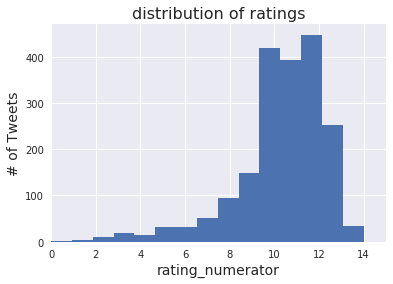

In [114]:
df_twitter_archive_master['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('# of Tweets', fontsize = 14)
plt.xlabel('rating_numerator', fontsize = 14)
plt.title('distribution of ratings', fontsize = 16)
plt.show();

### Insight 2 and visualization: In the dataframe "df_twitter_archive_master" the "golden_retriever" is the most common dog type predicted. As shown in the plot below the "Labrador_retriever" is second most, and the "Pembroke" is the third most common dog type predicted in this dataframe.

In [115]:
df_twitter_archive_master['p1'].value_counts()

golden_retriever             134
Labrador_retriever           91 
Pembroke                     88 
Chihuahua                    78 
pug                          54 
chow                         41 
Samoyed                      40 
Pomeranian                   38 
toy_poodle                   37 
malamute                     29 
cocker_spaniel               27 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           21 
seat_belt                    21 
German_shepherd              20 
Siberian_husky               19 
Staffordshire_bullterrier    19 
Eskimo_dog                   18 
Shetland_sheepdog            18 
Cardigan                     17 
Shih-Tzu                     17 
beagle                       17 
Maltese_dog                  17 
teddy                        16 
Italian_greyhound            16 
Rottweiler                   16 
Lakeland_terrier             15 
kuvasz                       15 
web_site                     14 
          

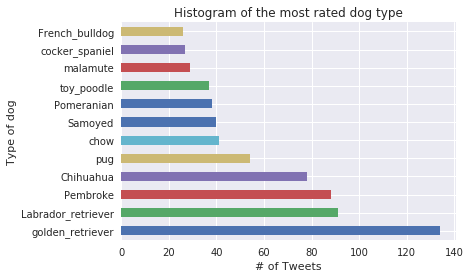

In [116]:
df_dog_type = df_twitter_archive_master.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the most rated dog type')
plt.xlabel('# of Tweets')
plt.ylabel('Type of dog')

fig = plt.gcf();

### Insight 3 and visualization: In the dataframe "df_twitter_archive_master" the highest numerator_ratings do receive the highest number of retweets as well.

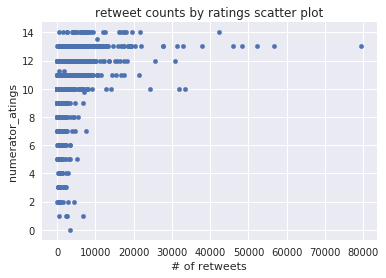

In [117]:
df_twitter_archive_master.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('# of retweets')
plt.ylabel('numerator_atings')
plt.title('retweet counts by ratings scatter plot')

fig = plt.gcf();